In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sb

###
- 특성데이터: 등급, 성별, 탑승금액,나이
- 라벨: 생존유무

# 1. 나이평균으로 채우시오
# 2. 정규화, train_test
# 3. 케라스 딥러닝으로 학습
# 4. (pclass= 1 sex=female, fare=$70, age=25) 경우 생존유무예측
# 5. train,test: 정확도, f1, confusion matrix
# - 3시까지 제출

In [2]:
titanic = sb.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.isna().sum() # 자료누락 확인용

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic['age'].fillna( titanic['age'].mean(), inplace=True) # 나이 관련 전처리 
titanic['sex'] = titanic['sex'].apply( lambda v: 0 if v == 'female' else 1) # 성별을 숫자로 변환

C:\Users\std\AppData\Local\Temp\ipykernel_13884\2757413940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna( titanic['age'].mean(), inplace=True) # 나이 관련 전처리


In [ ]:
# [ pclass= 1 sex= (female --> 0), fare=$70, age=25 ] 경우 생존유무예측
# train,test: 정확도, f1, confusion matrix

df = titanic
x_data = df[['pclass','sex','fare','age']]
y_data = df['survived']

print(x_data.shape, y_data.shape)
x_data

(891, 4) (891,)


,pclass,sex,fare,age
0,3,1,7.2500,22.000000
1,1,0,71.2833,38.000000
2,3,0,7.9250,26.000000
3,1,0,53.1000,35.000000
4,3,1,8.0500,35.000000
...,...,...,...,...
886,2,1,13.0000,27.000000
887,1,0,30.0000,19.000000
888,3,0,23.4500,29.699118
889,1,1,30.0000,26.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

x_train, x_test, y_train,y_test = train_test_split(x_data, y_data, test_size = 0.3 )

In [11]:
model = Sequential()
model.add(Dense(units=32,  activation='relu', input_dim =4 )) #  
model.add(Dense(units=16,  activation='relu'))
model.add(Dense(units=1,   activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['acc'])
h =model.fit(x_train, y_train, epochs=300)

Epoch 1/300


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5503 - loss: 2.067311
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5899 - loss: 0.7004 
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6444 - loss: 0.7711 
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6887 - loss: 0.6014
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6784 - loss: 0.5886
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7433 - loss: 0.5206
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7665 - loss: 0.5134
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7211 - loss: 0.5369 
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7504 - loss: 0.54371
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7427 - loss: 0.51257
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7517 - loss: 0.5301 
Epoch 12/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7021 - loss: 0.6395
Epoch 13/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

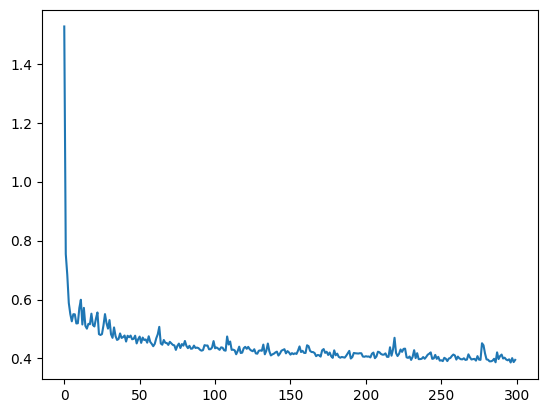

In [12]:
plt.plot( h.history['loss'])
plt.show()

In [20]:
# [ pclass= 1 sex= (female --> 0), fare=$70, age=25 ] 경우 생존유무예측
# model.predict(np.array([1, 0, 70, 25]))


y_train_pred = model.predict(x_train).argmax(axis=1)
y_test_pred  = model.predict(x_test).argmax(axis=1)

def sval(string,scope=locals()): print("\n"+string+" ==> "+str(eval(string,scope))+"\n")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
sval("x_train.shape, y_train.shape")
sval("x_test.shape,  y_test.shape")
sval("y_train_pred.shape, y_test_pred.shape")


x_train.shape, y_train.shape ==> ((623, 4), (623,))


x_test.shape,  y_test.shape ==> ((268, 4), (268,))


y_train_pred.shape, y_test_pred.shape ==> ((623,), (268,))



In [22]:
sval('accuracy_score( y_train, y_train_pred)') #  accuracy_score for train data 
sval('accuracy_score( y_test,  y_test_pred)' ) #  accuracy_score for test data


accuracy_score( y_train, y_train_pred) ==> 0.622792937399679


accuracy_score( y_test,  y_test_pred) ==> 0.6007462686567164



In [23]:
# from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

f1_score_train = f1_score( y_train, y_train_pred)  
f1_score_test =  f1_score( y_test,  y_test_pred )

sval('f1_score_train')
sval('f1_score_test')


f1_score_train ==> 0.0


f1_score_test ==> 0.0



In [ ]:
x_train

,pclass,sex,fare,age
28,3,0,7.8792,29.699118
701,1,1,26.2875,35.000000
141,3,0,7.7500,22.000000
190,2,0,13.0000,32.000000
101,3,1,7.8958,29.699118
...,...,...,...,...
577,1,0,55.9000,39.000000
803,3,1,8.5167,0.420000
280,3,1,7.7500,65.000000
18,3,0,18.0000,31.000000


In [28]:
x_test

,pclass,sex,fare,age
336,1,1,66.6000,29.0
130,3,1,7.8958,33.0
311,1,0,262.3750,18.0
528,3,1,7.9250,39.0
401,3,1,8.0500,26.0
...,...,...,...,...
171,3,1,29.1250,4.0
662,1,1,25.5875,47.0
417,2,0,13.0000,18.0
705,2,1,26.0000,39.0


In [29]:
y_train

28     1
701    1
141    1
190    1
101    0
      ..
577    1
803    1
280    0
18     0
248    1
Name: survived, Length: 623, dtype: int64

In [30]:
y_test

336    0
130    0
311    1
528    0
401    0
      ..
171    0
662    0
417    1
705    0
204    1
Name: survived, Length: 268, dtype: int64